# HW1 
Problem 2.9: Beta Coefficients (IBM & Apple vs S&P 500)

2.9 (Beta coefficients of stocks) The β of a stock is a coefficient that describes how the return on that stock is related to the return on a diversified stock portfolio. It is the slope coefficient in the simple linear regression model, y = α + βx, where y is the return on that stock and x is the return on a benchmark stock market index representing a diversified portfolio. In this exercise, we want to compare the β’s of IBM and Apple with reference to S&P 500.

The file IBM-Apple-SP500 RR Data.csv contains data on percentage monthly rates of return (adjusted for dividends and stock splits) from February 2005 until September 2013 for IBM, Apple and S&P 500. These rates were calculated by downloading historical monthly prices from the
Yahoo Finance website (http://finance.yahoo.com/). (You may download the current data instead.)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("IBM-Apple-SP500 RR Data.csv")
df.head()

,Unnamed: 0,Monthly Return Rate*,Unnamed: 2,Unnamed: 3,*Calculated based on close price adjusted for dividends and splits.
0,Date,S&P 500,IBM,Apple,NaN
1,9/3/2013,3.95%,4.22%,0.39%,NaN
2,8/1/2013,-3.13%,-6.08%,8.38%,NaN
3,7/1/2013,4.95%,2.06%,14.12%,NaN
4,6/3/2013,-1.50%,-8.13%,-11.83%,NaN


(a) Make scatter plots of rates of return of IBM versus S&P 500 and of Apple versus S&P 500 and comment on them.

In [6]:
#    Replace the current column names with the first row, then drop that row   
df.columns = df.iloc[0]   
df = df.iloc[1:].copy()
df = df[['S&P 500', 'IBM', 'Apple']].replace('%','', regex=True).astype(float) / 100 # Convert percentage strings into decimal numbers 
df.head()

,S&P 500,IBM,Apple
1,0.0395,0.0422,0.0039
2,-0.0313,-0.0608,0.0838
3,0.0495,0.0206,0.1412
4,-0.0150,-0.0813,-0.1183
5,0.0208,0.0319,0.0224


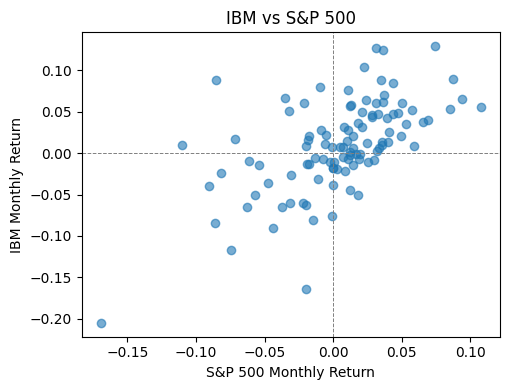

In [7]:
# Scatter plot: IBM returns vs S&P 500 returns
plt.figure(figsize=(5.2,4))
plt.scatter(df['S&P 500'], df['IBM'], alpha=0.6)
plt.xlabel('S&P 500 Monthly Return')
plt.ylabel('IBM Monthly Return')
plt.title('IBM vs S&P 500')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)   # horizontal line at y=0
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)   # vertical line at x=0
plt.tight_layout()
plt.show()

The IBM returns show a positive relationship with S&P 500 returns.

The points are moderately clustered along an upward trend, which suggests that IBM moves in the same direction as the overall market, but with less volatility than Apple.

The spread of IBM returns is relatively narrower, meaning IBM is more stable compared to Apple.

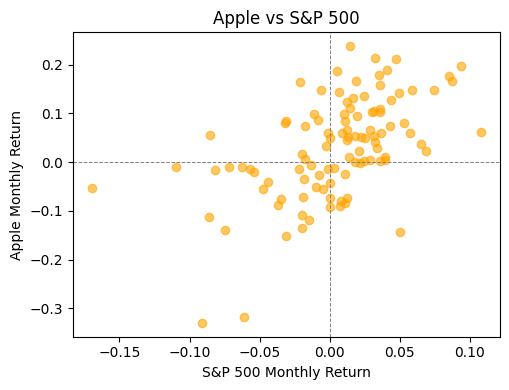

In [8]:
# Scatter plot: Apple returns vs S&P 500 returns
plt.figure(figsize=(5.2,4))
plt.scatter(df['S&P 500'], df['Apple'], alpha=0.6, color='orange')
plt.xlabel('S&P 500 Monthly Return')
plt.ylabel('Apple Monthly Return')
plt.title('Apple vs S&P 500')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.7)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

Apple returns also show a positive relationship with S&P 500 returns.

The scatter points are more widely spread out compared to IBM, showing higher volatility.

This suggests that Apple has larger swings in returns (both gains and losses) relative to the overall market.

(b) Calculate the β’s for IBM and Apple with reference to S&P 500. Comment on the relative magnitudes of the β’s. Which stock had a higher
expected return relative to S&P 500?

In [17]:
import statsmodels.api as sm

# Fit linear model: IBM returns ~ S&P 500 returns
X = sm.add_constant(df["S&P 500"])   # add intercept term
y_ibm = df["IBM"]                     # dependent variable
model_ibm = sm.OLS(y_ibm, X).fit()
print("IBM beta =", model_ibm.params["S&P 500"])

# Fit linear model: Apple returns ~ S&P 500 returns
X = sm.add_constant(df["S&P 500"])   # add intercept term
y_aapl = df["Apple"]
model_aapl = sm.OLS(y_aapl, X).fit()
print("Apple beta =", model_aapl.params["S&P 500"])

IBM beta = 0.7448087718790546
Apple beta = 1.2448563862674602


Apple’s beta is larger than IBM’s.
Since higher beta implies higher expected return, Apple has the higher expected return relative to the S&P 500.

(c) Calculate the sample standard deviations (SDs) of the rates of return for S&P 500, IBM and Apple. Also calculate the correlation matrix.
Check that β = rsy/sx for each stock where r is the correlation coefficient between S&P 500 and the given stock, sx is the sample SD of S&P 500 and sy is the sample SD of the given stock.

In [23]:
import numpy as np

# Sample standard deviations 
sd_sp = df["S&P 500"].std(ddof=1)   # ddof=1 for sample SD
sd_ibm = df["IBM"].std(ddof=1)
sd_aapl = df["Apple"].std(ddof=1)
print(sd_sp)
print(sd_ibm)
print(sd_aapl)

#  Correlation matrix 
corr_matrix = df[["S&P 500","IBM","Apple"]].corr()
print(corr_matrix)

# IBM
r_ibm = corr_matrix.loc["IBM", "S&P 500"]
beta_ibm_check = r_ibm * (sd_ibm / sd_sp)

# Apple
r_aapl = corr_matrix.loc["Apple", "S&P 500"]
beta_aapl_check = r_aapl * (sd_aapl / sd_sp)

print("\nBeta check (IBM):   ", beta_ibm_check)
print("Beta check (Apple): ", beta_aapl_check)


0.04457852558188212
0.055571051134871506
0.10310404422155045
0         S&P 500       IBM     Apple
0                                    
S&P 500  1.000000  0.597478  0.538232
IBM      0.597478  1.000000  0.414725
Apple    0.538232  0.414725  1.000000

Beta check (IBM):    0.7448087718790546
Beta check (Apple):  1.2448563862674606


(d) Explain based on the statistics calculated how a higher expected return is accompanied by higher volatility of the Apple stock.

From the calculations, Apple’s sample standard deviation of returns (≈ 0.103) is almost twice that of IBM (≈ 0.056), indicating that Apple’s returns are more volatile. Consistently, Apple’s beta (≈ 1.25) is also much higher than IBM’s beta (≈ 0.74), meaning Apple is more sensitive to market movements. A higher beta implies a higher expected return, since investors require compensation for bearing greater systematic risk. Thus, the higher expected return of Apple is accompanied by higher volatility, reflecting the risk–return tradeoff.

Problem 3. WHT problem 9(a)–(c) on page 122. Use the auto data set and be sure that origin is a factor (see previous problem). Find the correlation and scatterplot matricies and regress mpg on all other variables except for name. Hint: when finding correlations see the use="pair" option or use pairs.panels to do it all. Answer these questions.

library(psych)

pairs.panels(auto[,c(2:8,1)], stars=T, density=T) # part a

round(cor(auto[,1:7], use="pair"),4) # part b

fit = lm(mpg~., auto[,1:8]) # part c

summary(fit)

(a) Produce a scatterplot matrix which includes all of the variables in the data set.

In [53]:
auto = pd.read_csv("Auto.csv", na_values="?") # tell pandas to treat ? as missing

auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


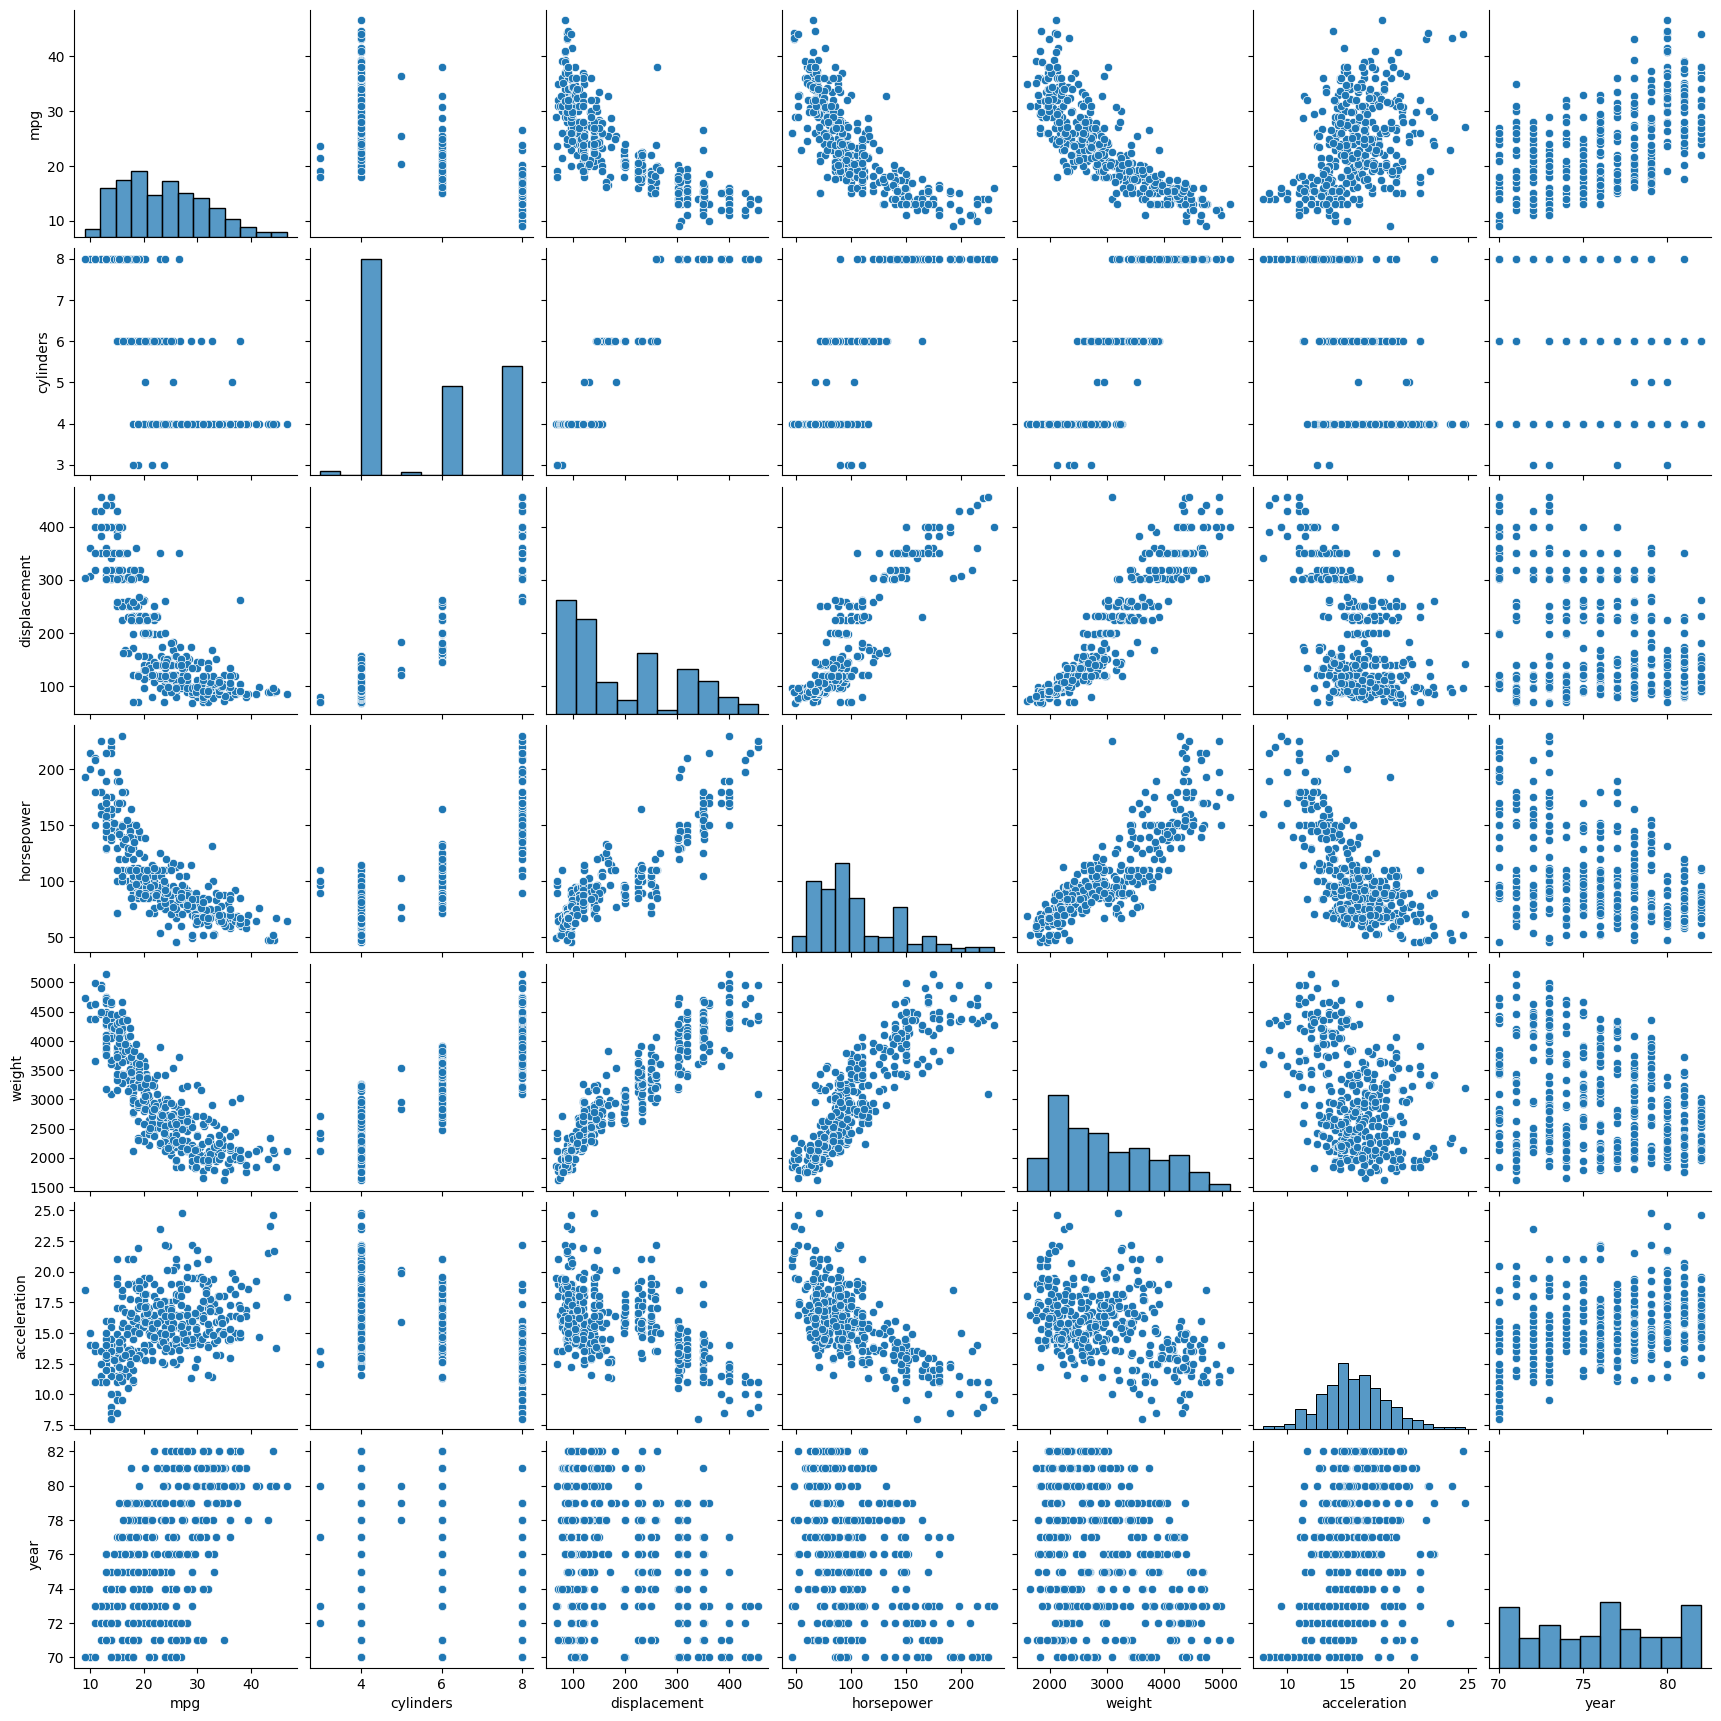

In [63]:
import seaborn as sns

auto["origin"] = auto["origin"].astype("category")

# Scatterplot matrix of numeric variables only
sns.pairplot(auto.drop(columns=["name"]))
plt.show()


(b) Compute the matrix of correlations between the variables using the DataFrame.corr() method. .corr()

In [60]:
corr_matrix = auto.iloc[:, 0:8].corr()   # exclude name
print(corr_matrix.round(4))

                 mpg  cylinders  displacement  horsepower  weight  \
mpg           1.0000    -0.7763       -0.8044     -0.7784 -0.8317   
cylinders    -0.7763     1.0000        0.9509      0.8430  0.8970   
displacement -0.8044     0.9509        1.0000      0.8973  0.9331   
horsepower   -0.7784     0.8430        0.8973      1.0000  0.8645   
weight       -0.8317     0.8970        0.9331      0.8645  1.0000   
acceleration  0.4223    -0.5041       -0.5442     -0.6892 -0.4195   
year          0.5815    -0.3467       -0.3698     -0.4164 -0.3079   
origin        0.5637    -0.5650       -0.6107     -0.4552 -0.5813   

              acceleration    year  origin  
mpg                 0.4223  0.5815  0.5637  
cylinders          -0.5041 -0.3467 -0.5650  
displacement       -0.5442 -0.3698 -0.6107  
horsepower         -0.6892 -0.4164 -0.4552  
weight             -0.4195 -0.3079 -0.5813  
acceleration        1.0000  0.2829  0.2101  
year                0.2829  1.0000  0.1843  
origin            

(c) Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the output. For instance:
i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.
ii. Which predictors appear to have a statistically significant relationship to the response?
iii. What does the coefficient for the year variable suggest?

In [57]:
import statsmodels.formula.api as smf

fit = smf.ols("mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin",
              data=auto).fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Tue, 23 Sep 2025   Prob (F-statistic):          1.79e-139
Time:                        10:52:31   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.9546      4.677     -3.839   

from statsmodels.stats.anova import anova_lm

anova_lm(fit)

Yes. In the summary, the F-statistic = 224.5 with Prob (F-statistic) = 1.79e-139 (essentially 0).

This means we reject the null hypothesis that all slope coefficients are zero.

The ANOVA table also shows extremely small p-values. This provides strong evidence that at least some predictors are significantly related to mpg.

According to the summary table, origin (T.2 and T.3), displacement, weight, and year are statistically significant (p < 0.05), while cylinders, horsepower, and acceleration are not significant when controlling for the other variables.

The coefficient for year (=0.777) suggests that, on average, newer cars are associated with higher fuel efficiency: for each additional model year, mpg increases by about 0.777, holding other factors constant.

(a) (3 points) Based on the scatterplots, comment on the relationships between the predictors and mpg.

The scatterplots show that mpg is negatively related to cylinders, displacement, horsepower, and weight (as these increase, mpg decreases)., but there is a positive relationship between mpg and both acceleration and year.

(b) (2 points) What is the correlation between mpg and displacement and what does it tell you? Which variables have significant relationships with mpg?

The correlation between mpg and displacement is −0.8044, which indicates a strong negative relationship. It means cars with larger displacement tend to have lower mpg. Significant correlations with mpg are also seen for cylinders (−0.7763), horsepower (−0.7784), weight (−0.8317), year (+0.5815), and origin (+0.5637).

(c) (2 points) Is there a statistically significant relationship between the predictors and the response? (Hint: do the F test using the multiple regression output)

Yes. The overall F-test from the regression output is highly significant (F = 224.5, p ≈ 1.79e-139), showing a statistically significant relationship between the predictors and mpg.

(d) (2 points) Which predictors appear to have a statistically significant relationship to the response in the multiple regression?

Based on the multiple regression summary, the significant predictors are origin (T.2, T.3), displacement, weight, and year with p-values smaller than 0.05. Cylinders, horsepower, and acceleration are not statistically significant with p-values larger than 0.05.

(e) (2 points) What does the slope coefficient for the year variable suggest?

The slope coefficient for year is 0.777, suggesting that, on average, newer cars are associated with higher fuel efficiency: for each additional model year, mpg increases by about 0.777, holding other factors constant.

(f) (2 points) What does the slope coefficient for the displacement variable suggest?

The slope coefficient for displacement is 0.024, which suggests that, holding the other predictors constant, a one-unit increase in displacement is associated with an average increase of about 0.02 mpg. This positive sign is different from the strong negative simple correlation, because in the multiple regression model the effects of displacement overlap with cylinders, horsepower, and weight. Once those are accounted for, the partial effect of displacement on mpg appears slightly positive.